In [1]:
# 1. Import pustaka
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
dt_bersih = pd.read_csv('../sampel/sampel_bersih.csv')

In [5]:
# 2. Ambil data
X_raw = dt_bersih['content']
y_raw = dt_bersih['label']


In [6]:
# 3. TF-IDF vektorisasi
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_raw).toarray()  # Output: array 2D

In [7]:
# 4. Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)            # e.g. ['positif','negatif','netral'] → [2,0,1]
y = to_categorical(y_encoded)                  # One-hot encoding → [0,1,0] dsb.

In [8]:
# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 6. Buat model DNN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output sesuai jumlah kelas
])

C:\Users\agnes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# 7. Kompilasi dan latih
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.4072 - loss: 1.0960 - val_accuracy: 0.6667 - val_loss: 1.0535
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7262 - loss: 1.0479 - val_accuracy: 0.7500 - val_loss: 1.0105
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9082 - loss: 0.9926 - val_accuracy: 0.9167 - val_loss: 0.9472
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9607 - loss: 0.9097 - val_accuracy: 0.9167 - val_loss: 0.8542
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9784 - loss: 0.7850 - val_accuracy: 0.9167 - val_loss: 0.7260
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9826 - loss: 0.6451 - val_accuracy: 0.9583 - val_loss: 0.5780
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.4701 - val_accuracy: 0.9583 - val_loss: 0.4318
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.3270 - val_accuracy: 0.9583 - val_loss: 0.3162


In [11]:
# 8. Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Akurasi: {acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9569 - loss: 0.1777
✅ Akurasi: 0.9667


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


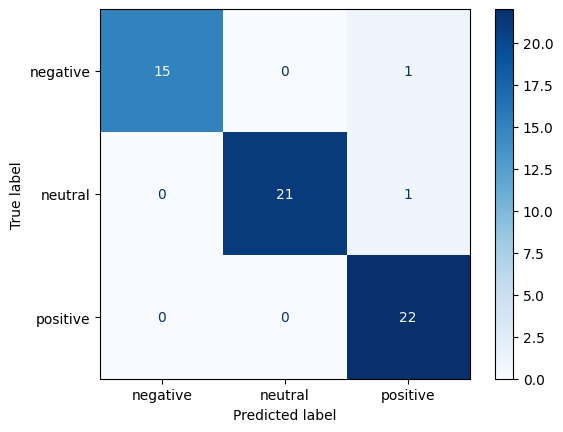

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Prediksi kelas dari X_test
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
# Ambil label sebenarnya
y_true = np.argmax(y_test, axis=1)

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Tampilkan
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        16
     neutral       1.00      0.95      0.98        22
    positive       0.92      1.00      0.96        22

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



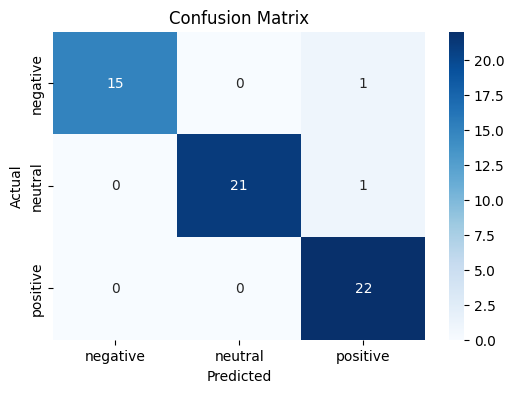

In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi: ambil kelas dengan probabilitas tertinggi
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Ambil label string kembali dari LabelEncoder
y_pred_labels = le.inverse_transform(y_pred)
y_true_labels = le.inverse_transform(y_true)

# Classification report
print(classification_report(y_true_labels, y_pred_labels))

# Confusion matrix
labels = le.classes_  # ['negative', 'neutral', 'positive']
cm = confusion_matrix(y_true_labels, y_pred_labels, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=labels, 
    yticklabels=labels
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [27]:
plt.savefig("confusion_matrix.png")

<Figure size 640x480 with 0 Axes>

In [12]:
ulasan_baru = ["game ini bagus banget", "jelek dan lag terus"]
X_baru = vectorizer.transform(ulasan_baru).toarray()
pred = model.predict(X_baru)
hasil = le.inverse_transform(pred.argmax(axis=1))
print("Prediksi:", hasil)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Prediksi: ['positive' 'negative']


In [14]:
model.save('sentiment_DNN_v1.keras')

In [17]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']